In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


In [36]:
heart_df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [58]:
heart_df.shape

(302, 14)

In [37]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
heart_df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [39]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
#Check duplicate rows in data
duplicate_rows = heart_df[heart_df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)


Number of duplicate rows ::  (1, 14)


In [41]:
#we have one duplicate row.
#Removing the duplicate row
heart_df = heart_df.drop_duplicates()
duplicate_rows = heart_df[heart_df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


In [42]:
#Looking for null values
print("Null values :: ")
print(heart_df.isnull() .sum())
#Check if the other data is consistent
heart_df.shape

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


(302, 14)

<AxesSubplot:xlabel='thall'>

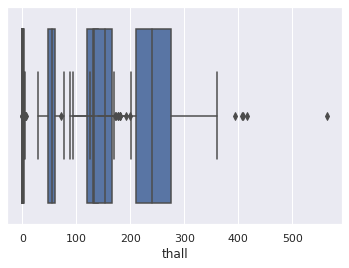

In [43]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=heart_df['age'])
#No Outliers observed in 'age'
sns.boxplot(x=heart_df['sex'])
#No outliers observed in sex data
sns.boxplot(x=heart_df['cp'])
#No outliers in 'cp'
sns.boxplot(x=heart_df['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=heart_df['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=heart_df['fbs'])
sns.boxplot(x=heart_df['restecg'])
sns.boxplot(x=heart_df['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=heart_df['exng'])
sns.boxplot(x=heart_df['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=heart_df['slp'])
sns.boxplot(x=heart_df['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=heart_df['thall'])


In [44]:
#Find the InterQuartile Range
Q1 = heart_df.quantile(0.25)
Q3 = heart_df.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
dataframe = heart_df[~((heart_df<(Q1-1.5*IQR))|(heart_df>(Q3+1.5*IQR))).any(axis=1)]
dataframe.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(228, 14)

Text(0.5, 1.0, 'Pearson Correlation')

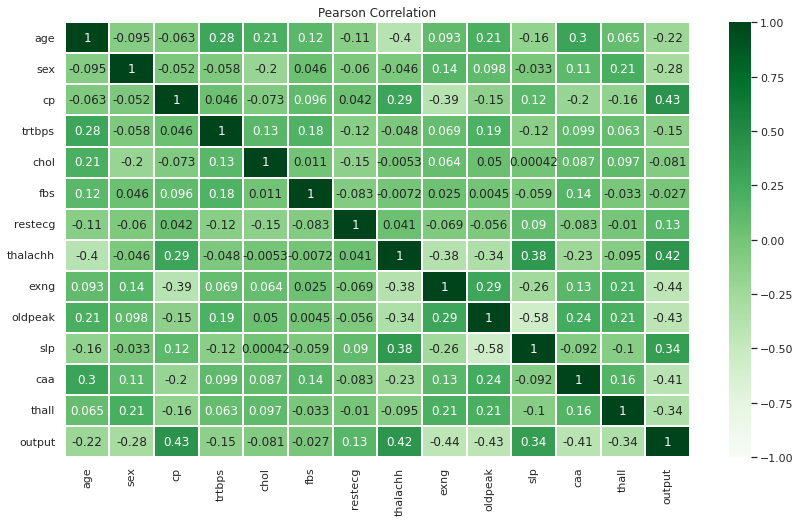

In [45]:
#Finding the correlation between variables
pearsonCorr = heart_df.corr(method='pearson')
spearmanCorr = heart_df.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

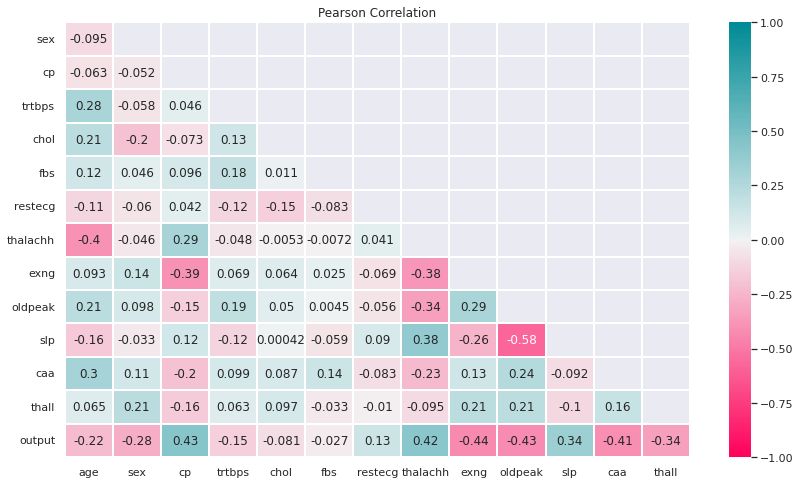

In [46]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

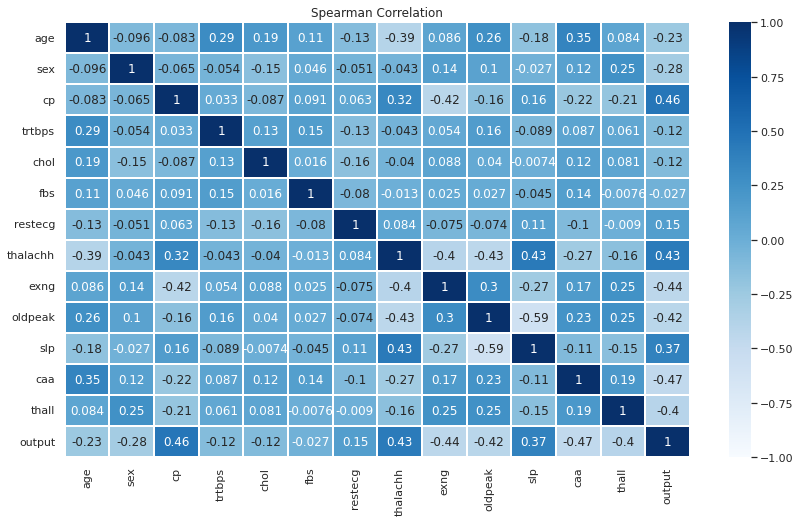

In [47]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [51]:
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = heart_df.drop("output", axis=1)
y = heart_df["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [53]:
#Building classification models
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))


Accuracy of logistic regression classifier ::  0.8681318681318682
nAccuracy of logistic regression classifier after removing features::  0.8571428571428571


In [54]:
# ***********************Decision Tree Classification***********************
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train,y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))
#Remove features which have low correlation with output (fbs, trtbps, chol)
x_train_dt = x_train.drop("fbs",axis=1)
x_train_dt = x_train_dt.drop("trtbps", axis=1)
x_train_dt = x_train_dt.drop("chol", axis=1)
x_train_dt = x_train_dt.drop("age", axis=1)
x_train_dt = x_train_dt.drop("sex", axis=1)
x_test_dt = x_test.drop("fbs", axis=1)
x_test_dt = x_test_dt.drop("trtbps", axis=1)
x_test_dt = x_test_dt.drop("chol", axis=1)
x_test_dt = x_test_dt.drop("age", axis=1)
x_test_dt = x_test_dt.drop("sex", axis=1)
decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)
print("Accuracy of decision Tree after removing features:: ", metrics.accuracy_score(y_test,y_pred_dt1))

Accuracy of Decision Trees ::  0.7252747252747253
Accuracy of decision Tree after removing features::  0.7252747252747253


In [55]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8131868131868132
Feature: Age, Score: 0.08681
Feature: Sex, Score: 0.03452
Feature: cp, Score: 0.09481
Feature: trtbps, Score: 0.06990
Feature: chol, Score: 0.08386
Feature: fbs, Score: 0.01119
Feature: restecg, Score: 0.01526
Feature: thalachh, Score: 0.10249
Feature: exng, Score: 0.07445
Feature: oldpeak, Score: 0.11008
Feature: slp, Score: 0.04819
Feature: caa, Score: 0.12185
Feature: thall, Score: 0.14657


In [56]:
#K Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.5934065934065934


In [57]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_dt1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))


*****************Models and their accuracy*****************
Logistic Regression Classifier ::  0.8571428571428571
Decision Tree ::  0.7252747252747253
Random Forest Classifier ::  0.8131868131868132
K Neighbours Classifier ::  0.5934065934065934
